In [5]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
from sbcbinaryformat import Streamer, Writer
import scipy.signal as sg
from mpl_toolkits.axes_grid1 import make_axes_locatable

ana_path = "../LAr10Ana/"
sys.path.insert(0, ana_path)

from GetEvent import GetEvent

%matplotlib inline

In [26]:
def plot_piezo_spectrum(data, ch, t_lim=None, freq_lim=100):
    acous = data["acoustics"]
    
    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(8, 8), gridspec_kw={'height_ratios': [0.4, 0.6]})

    ax1.plot(acous["time_s"]*1000, acous["Waveforms_V"][0, 4], label="Piezo driver")
    ax1.plot(acous["time_s"]*1000, acous["Waveforms_V"][0, ch-1], label=f"Ch{ch}")
    ax1.set_ylabel("Amplitude (V)")
    if t_lim:
        ax1.set_xlim(*t_lim)
    ax1.legend()
    
    f, t, sxx = sg.spectrogram(acous["Waveforms_V"][0, ch-1], fs=np.float64(acous["sample_rate"]), 
                               nfft=256, noverlap=225, mode="psd", window="hann", nperseg=256)
    t -= data["run_control"]["acous"]["pre_trig_len"]
    sxx_log = 10 * np.log10(sxx)
    mesh = ax2.pcolormesh(t*1000, f/1000, sxx_log, shading="auto")
    
    divider = make_axes_locatable(ax2)
    cax = divider.append_axes("bottom", size="5%", pad=0.6)
    cbar = fig.colorbar(mesh, cax=cax, label="log PSD", orientation="horizontal")
    ax2.set_xlabel("Time (ms)")
    ax2.set_ylabel("Frequency (kHz)")
    ax2.set_ylim(0,freq_lim)
    fig.suptitle(f"Run {run} ev {event} ch {ch}")
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_37298/3995040367.py:25: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()


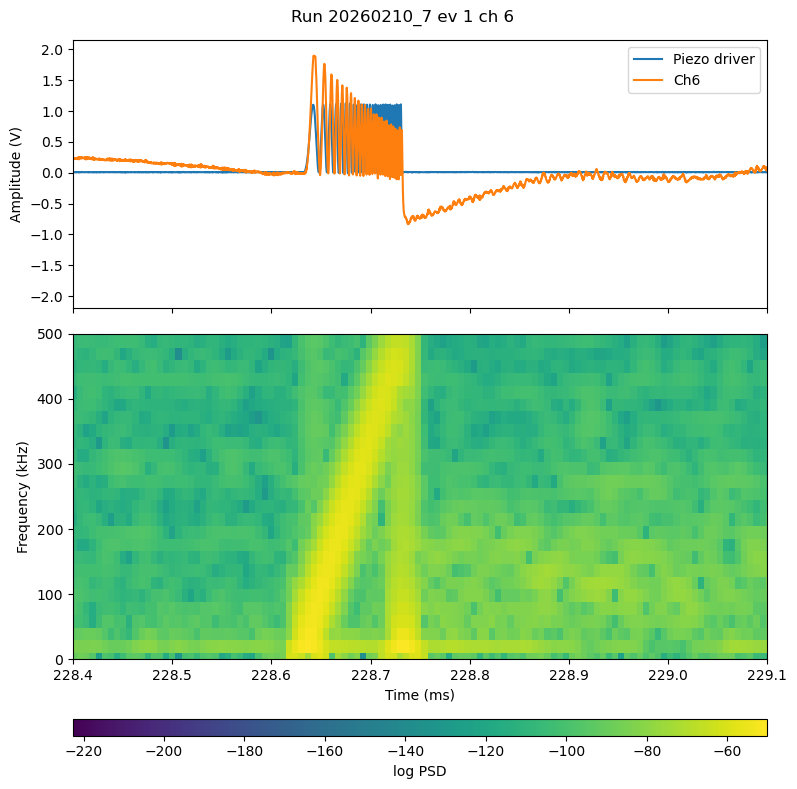

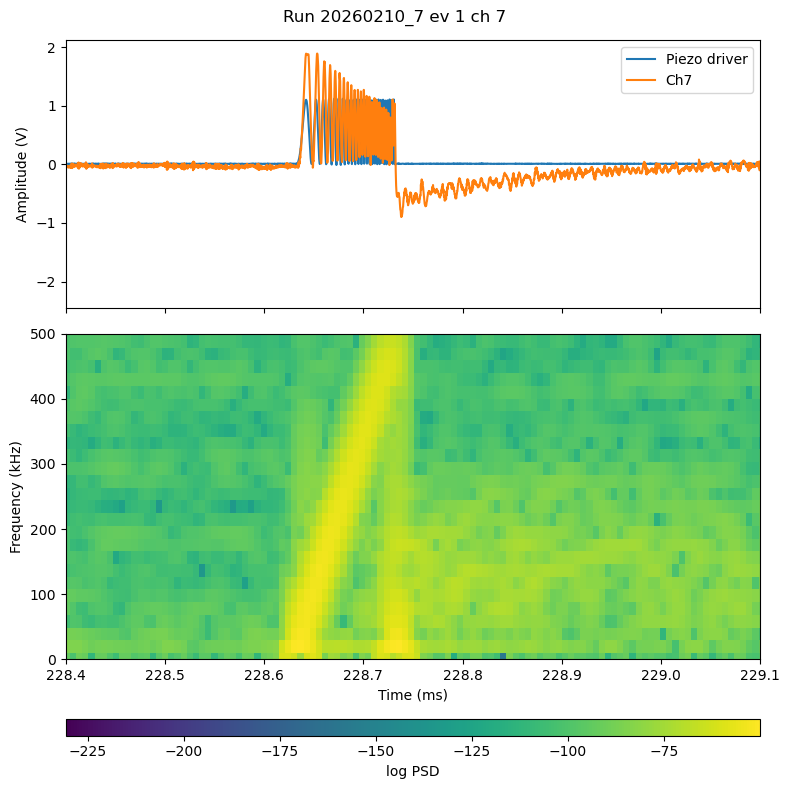

In [34]:
run = "20260210_7"
run_path = f"/exp/e961/data/SBC-25-daqdata/{run}.tar"
event = 1
data = GetEvent(run_path, event, strictMode=False, lazy_load_scintillation=False, physical_units=True)
plot_piezo_spectrum(data, ch=6, t_lim=(228.4, 229.1), freq_lim=500)
plot_piezo_spectrum(data, ch=7, t_lim=(228.4, 229.1), freq_lim=500)

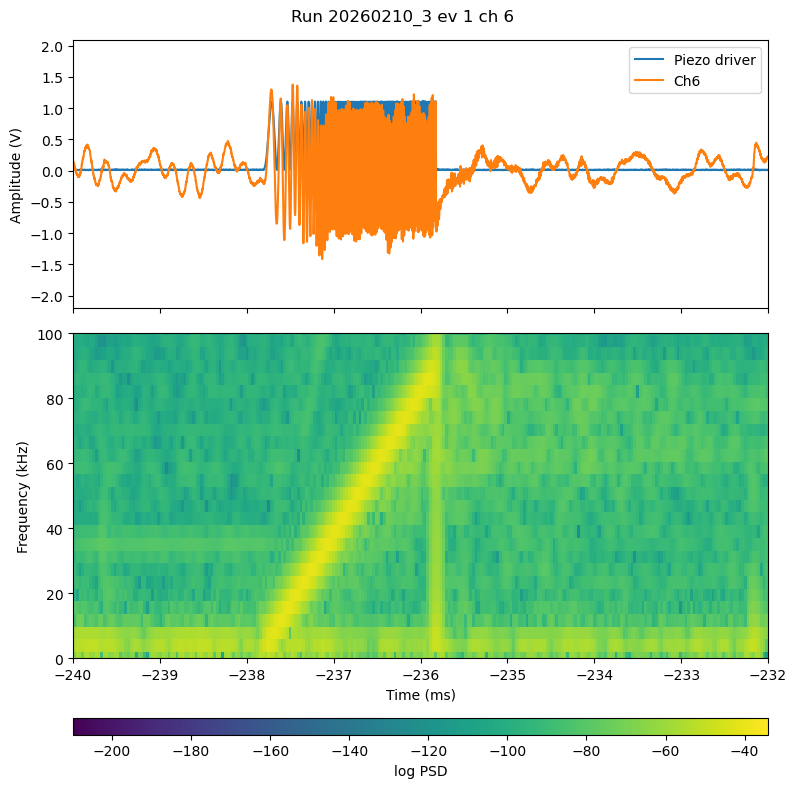

In [33]:
run = "20260210_3"
run_path = f"/exp/e961/data/SBC-25-daqdata/{run}.tar"
event = 1
data = GetEvent(run_path, event, strictMode=False, lazy_load_scintillation=False, physical_units=True)
plot_piezo_spectrum(data, 6, t_lim=(-240,-232), freq_lim=100)